<a href="https://colab.research.google.com/github/shebogholo/pytorch/blob/master/Feed-forward%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [0]:
import torch
import numpy as np
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision.datasets as dataset
from torch.utils.data import DataLoader
import torchvision.transforms as transform

## Load dataset

In [0]:
train_dataset = dataset.MNIST(root='data', train=True, transform=transform.ToTensor(), download=True)
test_dataset  = dataset.MNIST(root='data', train=False, transform=transform.ToTensor())

In [19]:
print('Train data: ',len(train_dataset))
print('Test  data: ',len(test_dataset))

Train data:  60000
Test  data:  10000


## Make dataset interable

#### We need to split these 60000 training samples (images) into small groups(batches) and pass these batches into our model. 
Why do we have to split the data:-
- Passing the whole dataset requires a lot of RAM of your CPU/GPU. (Out-Of-Memory)
- Passing the whole dataset cause unstable training as a result of accumulating all the error and update model parameters once rather than updating gradually.

## Epoch
Hyperparameter that define the number of times the learning algorithm will work through the entire dataset.
One Epoch is when the entire dataset is passed forward and backward only once.

### Batch size
The number of examples present in a single batch, i.e examples to work through before updating internal model parameters.

### Iterations
It define the number of baches needed to complete one epoch.

In [0]:
batch_size = 64
num_epochs = 5
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [0]:
# function to show an image
def show_image(image):
  image = image.numpy()
  plt.imshow(np.transpose(image, (1, 2, 0)))

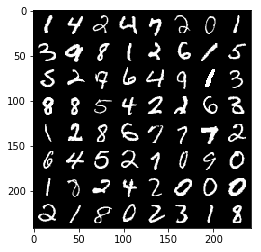

In [35]:
# get random training images
images, labels = iter(train_loader).next()
show_image(torchvision.utils.make_grid(images))

## Define a Model

In [0]:
class Network(nn.Module):
    def __init__(self, input_dimension, hidden_dimension, output_dimension):
        super(Network, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dimension, hidden_dimension) 
        # Non-linearity
        self.sigmoid = nn.Sigmoid()
        # Linear function
        self.fc2 = nn.Linear(hidden_dimension, output_dimension)  

    def forward(self, x):
        output = self.fc1(x)
        # Non-linearity
        output = self.sigmoid(output)
        # Linear function
        output = self.fc2(output)
        return output

#### Instantiate amodel
- Input dimention:  28*28   Size of image
- Hidden dimension: 150     Number of neurons
- Output dimension: 10      Number of classes

In [0]:
model = Network(28*28, 150, 10)

In [38]:
print(model)

Network(
  (fc1): Linear(in_features=784, out_features=150, bias=True)
  (sigmoid): Sigmoid()
  (fc2): Linear(in_features=150, out_features=10, bias=True)
)


## Define Loss function

## Define Optimizer

## Train a Model